In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# a function to create a random n by n non symmetric matrix
def random_matrix(n):
    A = np.random.rand(n,n)
    return A

# a function to calculate the eigenvalues of a matrix
def eigenvalues(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return eigenvalues

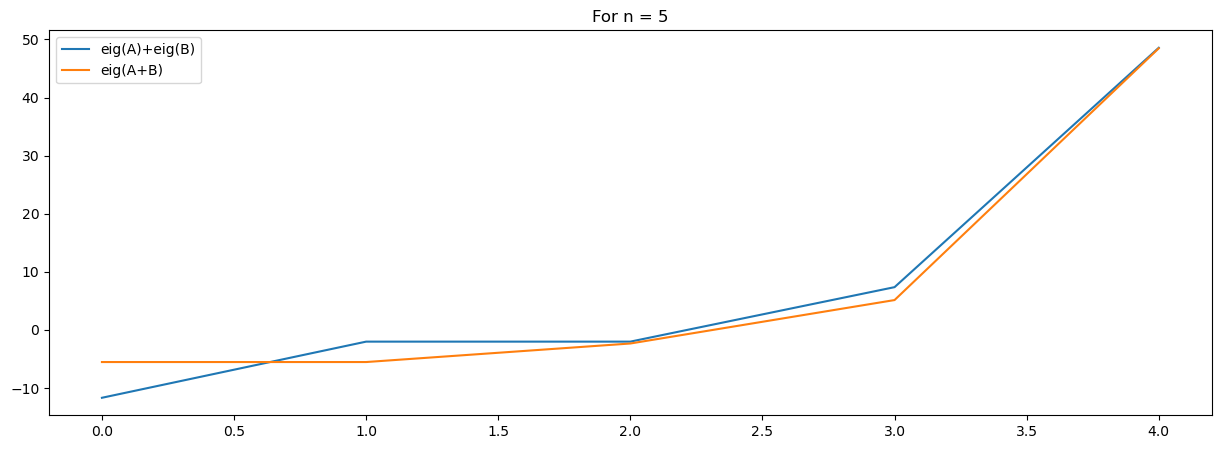

In [136]:
n = 5
A = random_matrix(n)*10
B = random_matrix(n)*10
# print(A)
C = A + B
eigA = np.sort(eigenvalues(A))
eigB = np.sort(eigenvalues(B))
eigC = np.sort(eigenvalues(C))

plt.figure(figsize=(15,5))
plt.plot(eigA+eigB, label='eig(A)+eig(B)')
plt.plot(eigC, label='eig(A+B)')
plt.legend()
plt.title('For n = '+str(n))
plt.show()

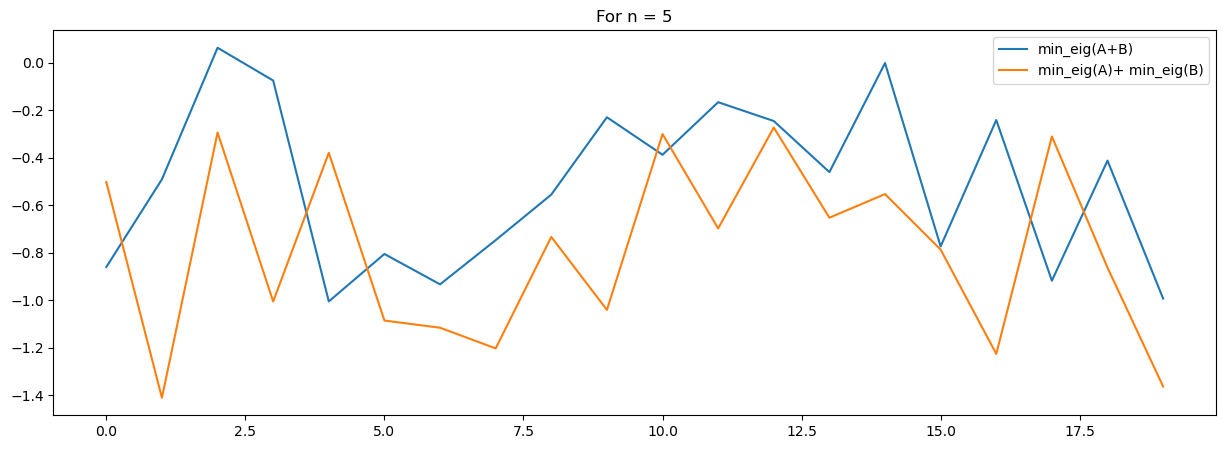

In [126]:
min_eigA = []
min_eigB = []
min_eigC = []
min_eigAB = []
for i in range(20):
  A = random_matrix(n)
  B = random_matrix(n)
  C = A + B
  min_eigC.append(min(eigenvalues(C)))
  min_eigAB.append(min(eigenvalues(B))+min(eigenvalues(B)))

plt.figure(figsize=(15,5))
# plt.plot(min_eigA, label='min eigenvalue of A')
# plt.plot(min_eigB, label='min eigenvalue of B')
plt.plot(min_eigC, label='min_eig(A+B)')
plt.plot(min_eigAB, label='min_eig(A)+ min_eig(B)')
plt.legend()
plt.title('For n = '+str(n))
plt.show()

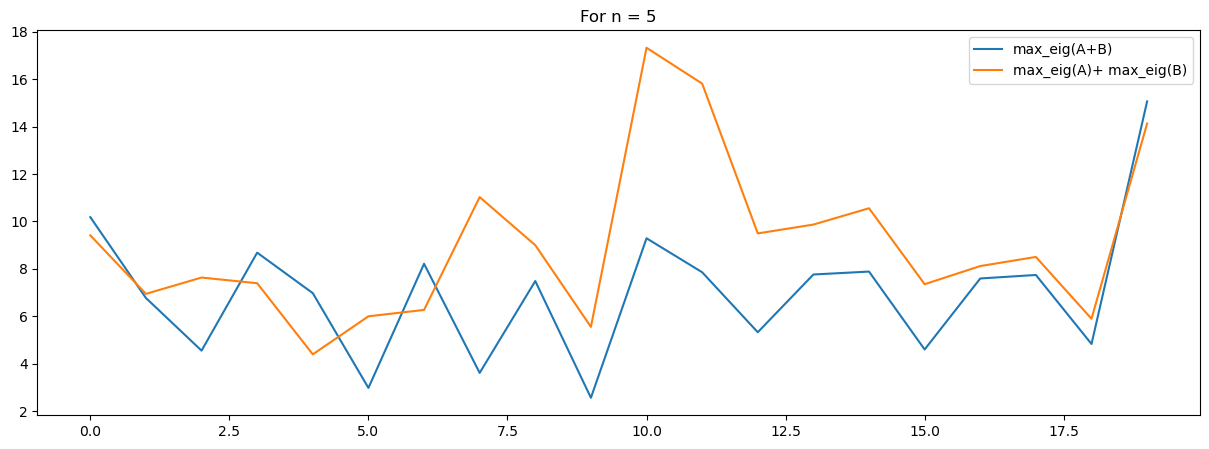

In [110]:
max_eigA = []
max_eigB = []
max_eigC = []
max_eigAB = []
for i in range(20):
  A = random_matrix(n)*10-20
  B = random_matrix(n)*10-20
  C = A + B
  max_eigC.append(max(eigenvalues(C)))
  max_eigAB.append(max(eigenvalues(A))+max(eigenvalues(B)))

plt.figure(figsize=(15,5))
plt.plot(max_eigC, label='max_eig(A+B)')
plt.plot(max_eigAB, label='max_eig(A)+ max_eig(B)')
plt.legend()
plt.title('For n = '+str(n))
plt.show()



# for matrices with positive entries the sum of max eigenvalues are close to the max eigenvalue of the sum of the matrices. 
# for matrices with negative entries this is not true anymore.